# Machine Learning Tutorial: Linear Regression Prediction

In this tutorial I am predicting home prices using linear regression. We use training data that has home areas in square feet and corresponding prices and train a linear regression model using sklearn linear regression class. 

Later, I used a linear regression model to predict the per capita income in Canada in 2020! 

In [1]:
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv", "homeprices.csv")

('homeprices.csv', <http.client.HTTPMessage at 0x7fc3dec27780>)

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


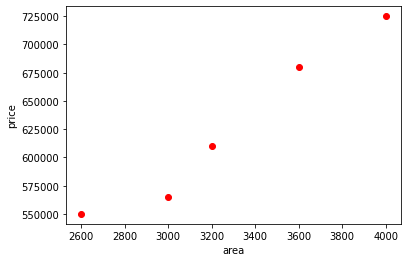

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='o')

In [6]:
# help(df.drop)

In [7]:
new_df = df.drop('price',axis='columns')
new_df
# This is my predictor variable. 

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [29]:
# help(linear_model.LinearRegression())

In [10]:
# help(reg.fit)

In [11]:
# Create linear regression object
reg = linear_model.LinearRegression()
# for fit function, fit(X, y, sample_weight=none)
# Where X is the training data and y are target values
reg.fit(new_df,price)

LinearRegression()

#### Now let's do a few examples: 
Predict the price of a home with area of 3300 square feet:

In [30]:
# help(reg.predict)
reg.predict([[3300]])

array([628715.75342466])

For a house of 3300 square feet, I'm predicting that the price is $628,715

### Predict the price of a home with area = 5000 sq ft

In [31]:
reg.predict([[5000]])

array([859554.79452055])

### Predict prices of homes for an array of multiple areas

In [14]:
# First read this in:
urlretrieve("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv", "areas.csv")
areas = pd.read_csv('areas.csv')

In [15]:
areas

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [16]:
p = reg.predict(areas)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

This is messy to look at, so let's organize all our data into neatly organized CSVs:

In [17]:
# Insert a new column with the predicted prices of these data:
areas['prices'] = p
areas
# If I wanted to continue on to save these: 
# areas.to_csv("prediction.csv")

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


### Exercise
Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [18]:
urlretrieve("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv", "canada_per_capita_income.csv")


('canada_per_capita_income.csv', <http.client.HTTPMessage at 0x7fc3e25c0780>)

In [32]:
canada_per_capita_income = pd.read_csv("canada_per_capita_income.csv")
# Now let's take a quick look:
canada_per_capita_income.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [33]:
# I was annoyed because one of the column names has spaces and it makes it annoying to deal with that variable, so changing spaces to underscores:
canada_per_capita_income.columns = [c.replace(' ', '_') for c in canada_per_capita_income.columns]
canada_per_capita_income.columns

# This is still difficult to work with.... so I will instead just rename it

Index(['year', 'per_capita_income_(US$)'], dtype='object')

In [34]:
canada_per_capita_income.rename(columns={'per_capita_income_(US$)': 'income'}, inplace=True)
canada_per_capita_income.columns

Index(['year', 'income'], dtype='object')

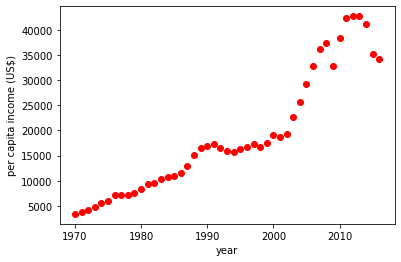

In [35]:
# A quick visualizaiton with variables that are finally super easy to access:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(canada_per_capita_income.year,canada_per_capita_income.income,color='red',marker='o')

In [36]:
NEW_canada = canada_per_capita_income.drop('income',axis='columns')
# Now New_canada should be a dataframe with only the years. Let's see the first 3 entries:
NEW_canada.head(3)

,year
0,1970
1,1971
2,1972


In [37]:
income = canada_per_capita_income.income
# First three entries of the new variable, 'income'
income.head(3)

0    3399.299037
1    3768.297935
2    4251.175484
Name: income, dtype: float64

### To recall, my goal is to predict income in the year 2020 using linear regression:

In [38]:
# help(reg.fit)
# where the first entry is the training data (here my years) 
# And the second entry is what I am trying to predict, Income

In [39]:
# Create a linear regression object
reg_canada = linear_model.LinearRegression()
reg_canada.fit(NEW_canada,income)

LinearRegression()

In [40]:
reg_canada.predict([[2020]])

array([41288.69409442])

### Answer: 
In 2020, the linear model predicts that the per capita income in Canada will be $41,288